<img src="opencosmo_simple_transparent.png" alt="Logo" width="650"/>

# OpenCosmo Tutorial - Comparing Radial Profiles with HAvoCC

In this example, we are going to use the "Cluster Profiles" query to compare mean radial profiles for halos in different virial mass ranges

If you haven't already, go to the [OpenCosmo](https://cosmoexplorer.alcf.anl.gov) portal, log in using your ALCF credentials (when it asks for the institution pick Argonne LCF), and navigate to Cluster Profiles (HAvoCC Analysis). We are going to run this query twice. For the first run, click "start new flow" and set the following parameters under the "Mass Selection" tab:

| **Parameter**             | **Value**      | **Description**                         |
|--------------------------|----------------|-----------------------------------------|
| Mass Field               | `sod_halo_MVir` | Halo mass definition                    |
| Log Mass Range (Low)     | `12`            | Lower mass bound for halo filtering     |
| Log Mass Range (High)    | `13`            | Upper mass bound for halo filtering     |

This tells **HAvoCC** to filter for halos with **virial masses** between \\(10^{12}\,M_\odot\\) and \\(10^{13}\,M_\odot\\).

Now, click **Start Flow**.  
After some time, the flow should complete successfully, and a green **`Download Results`** button will appear. Click this to download a zipfile that contains the outputted plots, tabulated data (the raw data that goes into the plots), and the HAvoCC parameter file that was generated for this analysis.

Let's do it again. Without leaving the current page, click **Recreate Flow**. This will bring up the input form again with the parameters saved from your last run. Now, tell HAvoCC to filter for halos with **virial masses** between \\(10^{13}\,M_\odot\\) and \\(10^{14}\,M_\odot\\) by setting the following parameters:

| **Parameter**             | **Value**      | **Description**                         |
|--------------------------|----------------|-----------------------------------------|
| Mass Field               | `sod_halo_MVir` | Halo mass definition                    |
| Log Mass Range (Low)     | `13`            | Lower mass bound for halo filtering     |
| Log Mass Range (High)    | `14`            | Upper mass bound for halo filtering     |

Download the results once again.

Now, let's look at the plots that were outputted. If you open up the `figures` directory in the downloads, you should see a number of profiles that were created. In this example, I am going to look at Gas Density. Putting the outputted density profiles side-by-side looks like this:
![nice plots, bro](combined_ClusterGasDensityProfile.png)

*But what if we wanted to show the two profiles on the same plot?*

To do this, we can use the raw data located in the `tabulated_data` directory. Inspecting one of the `ClusterGasDensityProfile.txt` files gives:
![Nice data, dawg](gas_density_data.png)

Note that there are NaN entries at the smallest radii where there is insufficient resolution to profile. Let's plot this data!

Here is a function that takes in a list of folders, organized like the results we downloaded from the query, a list of labels for the figure legend, and a `profile_type`, following the naming convention of the filenames (e.g. `"GasDensity"`, `"GasMetallicity"`, `"GasTemperature"`, etc.).

In [80]:
import numpy as np
import matplotlib.pyplot as plt

def compare_profiles(folders, labels, profile_type="GasDensity"):
    plt.figure(figsize=(8, 6))

    for folder, label in zip(folders, labels):
        try:
            data = np.loadtxt(f"{folder}/tabulated_data/Cluster{profile_type}Profile.txt", usecols=range(4), unpack=True)

            # the first 4 columns are r/R500, y, y-error_low, and y-error_high
            r, val, errlow, errhigh = data

            plt.plot(r, val, label=label)

            # add shading between errorbars
            plt.fill_between(r, val - errlow, val + errhigh, alpha=0.3)
        except Exception as e:
            print(f"Failed to load data from {folder}: {e}")

    plt.xlabel(r"$\log\left(\frac{r}{R_\mathrm{500c}}\right)$", fontsize=15)
    plt.ylabel(profile_type, fontsize=15)
    plt.yscale("log")
    plt.title(f"{profile_type} Profiles")
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


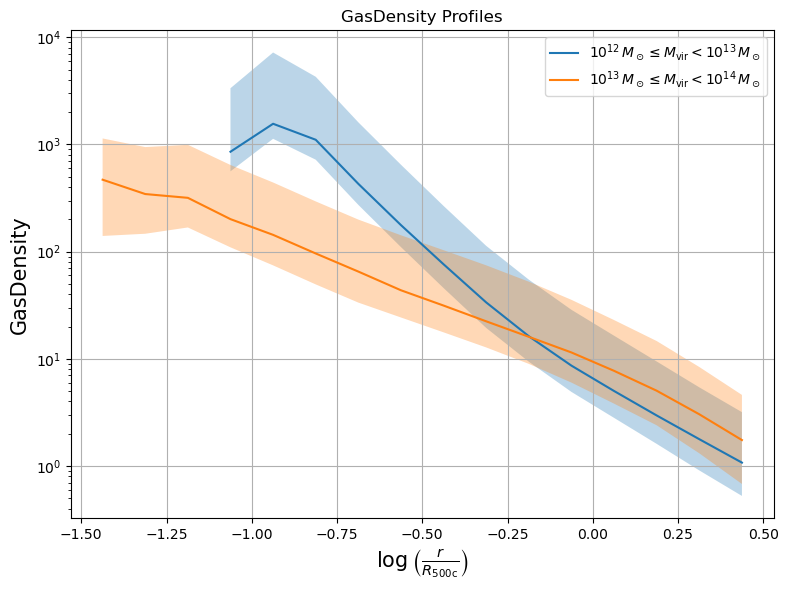

In [83]:
# set folder names and figure labels (NOTE: I renamed my downloads to radial_profile_Mvir_<12_13/13_14>)
f1, label1 = "radial_profiles_Mvir_12_13", r"$10^{12}\,M_\odot \leq M_\mathrm{vir} < 10^{13}\,M_\odot$"
f2, label2 = "radial_profiles_Mvir_13_14", r"$10^{13}\,M_\odot \leq M_\mathrm{vir} < 10^{14}\,M_\odot$"

folders, labels = [f1, f2], [label1, label2]

compare_profiles(folders, labels, profile_type="GasDensity")

... and just like that, we have successfully created and compared stacked radial profiles for different mass bins. **Wow! Amazing!**